<h1>Cross Validataion</h1>

<h4>k分割交差検証</h4>
cross_val_score()関数は、デフォルトで5分割交差検証を行い、5つの精度を返す。パラメータcvで分割数を変更することができる<br>
交差検証の精度をまとめるには、一般に平均値を用いる<br>
cross_val_scoreは分類タスクの場合、デフォルトで後に述べる層化k分割交差検証となる
cross_val_predict()関数は、訓練セットのすべてのインスタンスのスコア(method引数で、予測値そのもの（predict）やdecision_function, predict_probaなどを設定できる)を計算して返却する

<h4>層化k分割交差検証</h4>
層化交差検証では、各分割内でのクラスの比率が全体の比率と同じになるように分割する<br>
一般に、クラス分類器を評価するには、単純なk分割交差検証ではなく層化k分割交差検証を使った方がよい<br>
回帰に関しては、scikit-learnは標準的なk分割交差検証（層化ではない）をデフォルトで用いる<br>
scikit-learnでは、cvパラメータに交差検証分割器を与えることでデータの分割方法をより詳細に制御することができる

<h4>1つ抜き交差検証（LeaveOneOut）</h4>
1つ抜き交差検証は、k分割交差検証の個々の分割が1サンプルしかないものだと考えることができる

<h4>シャッフル分割交差検証</h4>
この手法では、毎回train_size個の点を選び出して訓練セットとし、test_size個の（訓練セットとは重複しない）点を選び出してテストセットとする。これをn_splits回繰り返す<br>
シャッフル分割交差検証を用いると、訓練セットとテストセットのサイズとは独立に繰り返し回数を制御できる<br>
train_sizeとtest_sizeの和が1にならないように設定することで、データの一部だけを用いるようにすることもできる（サブサンプリング）<br>
ShuffleSplitにも層化バージョンがある（StratifiedShuffleSplit）

<h4>グループ付き交差検証</h4>
例えば、顔画像から感情を認識するシステムを作るために、新しい顔に対する汎化性能を正確に評価するには、訓練セットとテストセットに含まれている人が重ならないようにする必要がある。これを実現するには、GroupKFoldを用いればよい。この関数は引数としてgroupsという配列を取る。この配列には画像に写っている人を指定する<br>
ここでは、group配列はデータに含まれる、訓練セットとテストセットを分割する際に分割してはならないグループを示す<br>
サンプルはグループごとに並んでいなくてもよい。個々のグループは完全に訓練セットに入っているか、完全にテストセットに入っているかのどちらかになる

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn

<h4>k分割交差検証</h4>

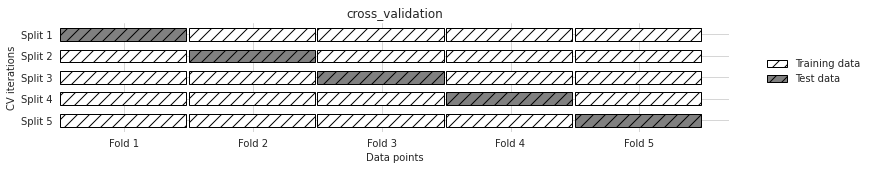

In [3]:
mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import load_iris
from sklearn.linear_model import  LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter = 10000)
scores = cross_val_score(logreg, iris.data, iris.target)
print(f"Cross-validation scores: {scores}")
scores = cross_val_score(logreg, iris.data, iris.target, cv = 3)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean():.2f}")
print(cross_val_predict(logreg, iris.data, iris.target, method = "decision_function"))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Cross-validation scores: [0.98 0.96 0.98]
Average cross-validation score: 0.97
[[  6.86543139   3.0033307   -9.86876209]
 [  6.54000007   3.16837191  -9.70837198]
 [  7.04240572   3.04772022 -10.09012594]
 [  6.53624798   3.04186497  -9.57811295]
 [  6.99902615   2.93687287  -9.93589902]
 [  6.15278325   2.70256974  -8.85535299]
 [  6.92602632   2.84374031  -9.76976663]
 [  6.59448978   3.00973943  -9.6042292 ]
 [  6.70001315   3.09147435  -9.7914875 ]
 [  6.48886221   3.1962355   -9.6850977 ]
 [  6.62929041   3.06700278  -9.69629319]
 [  6.39330976   2.84349836  -9.23680812]
 [  6.62291673   3.10688663  -9.72980336]
 [  7.54424634   2.89215647 -10.4364028 ]
 [  7.42235986   3.21751926 -10.63987912]
 [  6.89852546   2.79874273  -9.69726819]
 [  7.06950637   2.85374815  -9.92325453]
 [  6.72056934   2.91087358  -9.63144292]
 [  6.01376519   3.06985738  -9.08362257]
 [  6.74224679   2.78637293  -9.52861973]

<h4>層化k分割交差検証</h4>

In [5]:
print(f"Iris labels:\n{iris.target}")

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


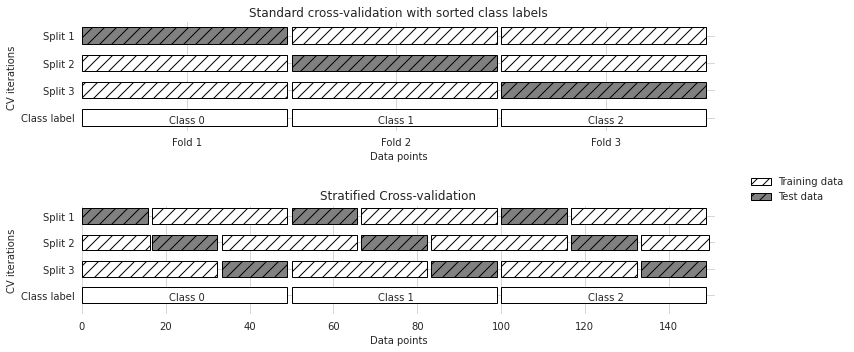

In [6]:
mglearn.plots.plot_stratified_cross_validation()

In [7]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv = kfold)}")
kfold = KFold(n_splits = 3)
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv = kfold)}")
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0) # 層化ではないが、データをシャッフルしてサンプルがラベル順に並ばないようにする
print(f"Cross-validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv = kfold)}")

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]
Cross-validation scores:
[0. 0. 0.]
Cross-validation score:
[0.98 0.96 0.96]


<h4>1つ抜き交差検証（LeaveOneOut）</h4>

In [8]:
from sklearn.model_selection import LeaveOneOut

loo =LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print("Number of cv iterations: ",len(scores))
print(f"Mean accuracy: {scores.mean():.2f}")
print(scores)

Number of cv iterations:  150
Mean accuracy: 0.97
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


<h4>シャッフル分割交差検証</h4>

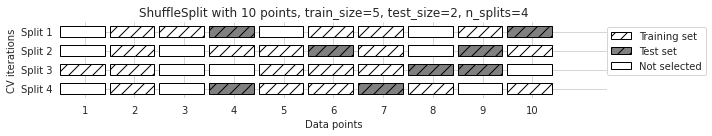

In [9]:
mglearn.plots.plot_shuffle_split()

In [10]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print(f"Cross-validation scores:\n{scores}")
shuffle_split = StratifiedShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print(f"Cross-validation scores:\n{scores}")

Cross-validation scores:
[0.98666667 0.97333333 0.97333333 0.97333333 0.97333333 0.96
 0.96       1.         0.92       0.94666667]
Cross-validation scores:
[0.97333333 0.97333333 0.98666667 0.97333333 0.96       1.
 0.96       0.96       0.96       0.94666667]


<h4>グループ付き交差検証</h4>

Cross-validation scores:
[0.75       0.6        0.66666667]


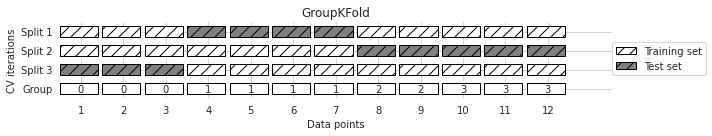

In [11]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 12, random_state = 0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups = groups, cv = GroupKFold(n_splits = 3))
print(f"Cross-validation scores:\n{scores}")
mglearn.plots.plot_group_kfold()